### MovieLens Dataset

In [1]:
!rm ml-100k.zip
!rm -rf ml-100k
!wget -O ml-100k.zip http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

rm: cannot remove ‘ml-100k.zip’: No such file or directory
--2021-11-26 00:59:50--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

100%[======================================>] 4,924,029   13.4MB/s   in 0.3s   

2021-11-26 00:59:51 (13.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  infla

In [88]:
import pandas as pd 
user_path = './ml-100k/u.user'
item_path = './ml-100k/u.item'
user_item = './ml-100k/u.data'

### Observe user data 
* 913 users within this dataset 
* contains user id, age, gender occupation, zipcode with delimiter '|'

In [28]:
user_df = pd.read_csv(user_path, names=['uid','age','gender','occupation','zipcode'],  sep='|')
user_df.head()

,uid,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [90]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zipcode     943 non-null    object
 5   LOC         943 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.3+ KB


### Observe item datasets 
* 1681 films 
* Each row with information - item id, title, release date, video release date, imdb url and 19 columns indicates the genres it belongs to 
* genres include - 'unknown','Action', 'Adventure', 'Animation', 'Childrens' , 'Comedy' , 'Crime','Documentary','Drama' ,'Fantasy' , 'Film-Noir' , 'Horror' , 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'

In [3]:
genres = ['unknown','Action' , 'Adventure', 'Animation', 'Childrens' , 'Comedy' , 'Crime', \
                                        'Documentary', 'Drama' ,'Fantasy' , 'Film-Noir' , 'Horror' , 'Musical', \
                                        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


item_df = pd.read_csv(item_path, names=['iid','title','release_date','video_release_date', 'imdb url'] + genres,  sep='|', encoding = "ISO-8859-1")



In [91]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iid                 1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

### Observe rating dataset
* 90640 entries 
* Each row contains item id, user id, rating and timestamp when rating is given 

In [93]:
user_item_df = pd.read_csv(user_item, names=['iid', 'uid', 'rating', 'timestamp'], sep='\t')

# merge item_df and user_df for further observation 
user_item_df = user_item_df.merge(item_df, on=['iid'])
user_item_df = user_item_df.merge(user_df, on=['uid'])
user_item_df.head() 

,iid,uid,rating,timestamp,title,release_date,video_release_date,imdb url,unknown,Action,...,Sci-Fi,Thriller,War,Western,year,age,gender,occupation,zipcode,LOC
0,196,242,3,881250949,Dead Poets Society (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Dead%20Poets%...,0,0,...,0,0,0,0,1989,33,M,educator,31404,314
1,305,242,5,886307828,"Ice Storm, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ice+Storm%2C+...,0,0,...,0,0,0,0,1997,33,M,educator,31404,314
2,6,242,4,883268170,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,...,0,0,0,0,1995,33,M,educator,31404,314
3,234,242,4,891033261,Jaws (1975),01-Jan-1975,NaN,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,...,0,0,0,0,1975,33,M,educator,31404,314
4,63,242,3,875747190,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,...,0,0,0,0,1994,33,M,educator,31404,314


In [92]:
user_item_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90640 entries, 0 to 90639
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iid                 90640 non-null  int64  
 1   uid                 90640 non-null  int64  
 2   rating              90640 non-null  int64  
 3   timestamp           90640 non-null  int64  
 4   title               90640 non-null  object 
 5   release_date        90469 non-null  object 
 6   video_release_date  0 non-null      float64
 7   imdb url            90469 non-null  object 
 8   unknown             90640 non-null  int64  
 9   Action              90640 non-null  int64  
 10  Adventure           90640 non-null  int64  
 11  Animation           90640 non-null  int64  
 12  Childrens           90640 non-null  int64  
 13  Comedy              90640 non-null  int64  
 14  Crime               90640 non-null  int64  
 15  Documentary         90640 non-null  int64  
 16  Dram

### Observe - Gender v.s. Genre 

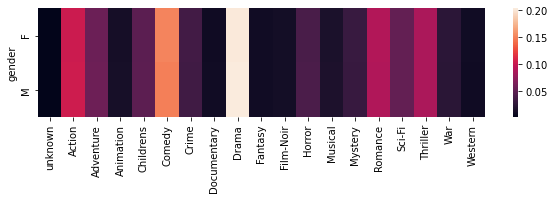

In [102]:
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heat_map(df, figsize=(10,7)): 
    df = df.div(df.sum(axis=1), axis=0)     
    plt.subplots(figsize=figsize)
    sns.heatmap(df)

gender = user_item_df[user_item_df['rating']>3][['gender']+genres].groupby(['gender']).sum()
plot_heat_map(gender, figsize=(10,2))
    

### Observe - Occupation v.s. Genre 

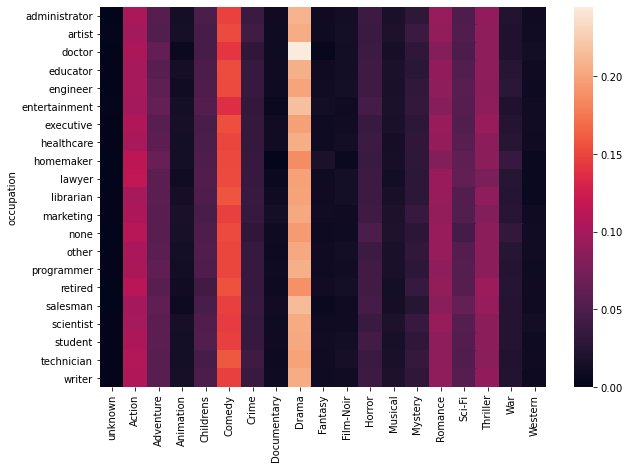

In [103]:
occupation = user_item_df[user_item_df['rating']>3][['occupation']+genres].groupby(['occupation']).sum()
plot_heat_map(occupation, figsize=(10,7))

### Observe - Age v.s. Genre 

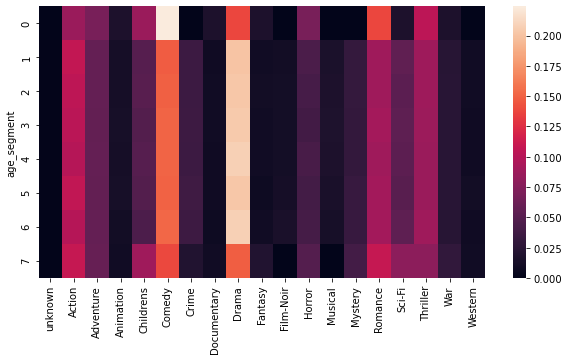

In [104]:
user_item_df['age_segment']=user_item_df['age']//10
age = user_item_df[user_item_df['rating']>3][['age_segment']+genres].groupby(['age_segment']).sum()
plot_heat_map(age, figsize=(10,5))

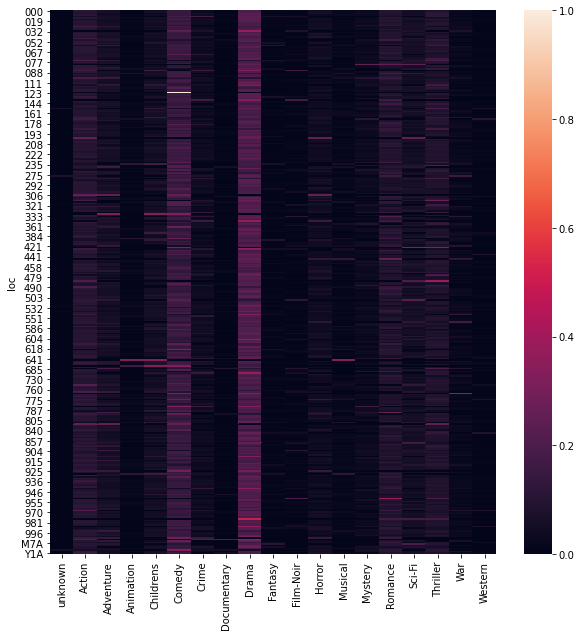

In [105]:
user_item_df['loc']=user_item_df['zipcode'].apply(lambda x: x[:3])
loc = user_item_df[user_item_df['rating']>3][['loc']+genres].groupby(['loc']).sum()
plot_heat_map(loc, figsize=(10,10))

In [121]:
from datetime import datetime

def to_year(x):
    try: 
        return int(datetime.strptime(x, "%d-%b-%Y").timetuple()[0])
    except: 
        return None
user_item_df['year'] = user_item_df['release_date'].apply(lambda x: to_year(x))




In [122]:
user_item_df[user_item_df['rating']>3][['age_segment']+['year']]

,age_segment,year
1,3,1997.0
2,3,1995.0
3,3,1975.0
6,3,1987.0
7,3,1997.0
...,...,...
90629,4,1954.0
90630,4,1967.0
90635,4,1969.0
90636,4,1986.0


In [133]:
year = user_item_df[user_item_df['rating']>3][['age_segment']+['year']]
year['count'] = 1 
year = year.groupby(['age_segment', 'year']).sum().reset_index()
year = year.pivot(index='age_segment', columns='year', values=['count'])
year = year.fillna(0)

year

count                                                          \
year        1922.0 1930.0 1931.0 1933.0 1934.0 1935.0 1936.0 1937.0 1938.0   
age_segment                                                                  
0              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1              2.0    4.0    2.0    5.0    9.0   11.0    2.0    5.0   10.0   
2              6.0    6.0    1.0    9.0   56.0   43.0   12.0   30.0   56.0   
3              5.0    9.0    1.0   10.0   50.0   30.0    5.0   24.0   35.0   
4              3.0    9.0    0.0    6.0   33.0   29.0    2.0   15.0   25.0   
5              1.0    5.0    0.0    5.0   19.0   17.0    0.0    8.0   13.0   
6              2.0    1.0    0.0    2.0    6.0    4.0    1.0    1.0    7.0   
7              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                    ...                                                      \
year        1939.0  ... 1989.0 1990.0 1991.0 1992.0  1993.0  1994.0  1995.0   
age_segment         ...                                                       
0              0.0  ...    0.0    1.0    0.0    2.0     4.0     4.0     2.0   
1              9.0  ...   68.0   63.0   57.0   83.0   309.0   373.0   477.0   
2             30.0  ...  365.0  352.0  257.0  480.0  1393.0  1967.0  2408.0   
3             21.0  ...  231.0  235.0  181.0  318.0   957.0  1360.0  1687.0   
4             16.0  ...  163.0  150.0  130.0  221.0   667.0   888.0  1107.0   
5              9.0  ...  114.0  110.0   79.0  148.0   437.0   645.0   734.0   
6              3.0  ...   28.0   33.0   19.0   30.0   110.0   144.0   171.0   
7              0.0  ...    1.0    0.0    0.0    0.0     5.0     6.0     6.0   

                                    
year         1996.0  1997.0 1998.0  
age_segment                         
0               6.0     5.0    1.0  
1             619.0   807.0   76.0  
2            3102.0  4077.0  388.0  
3            2171.0  2740.0  261.0  
4            1440.0  1790.0  186.0  
5             901.0  1273.0  138.0  
6             228.0   320.0   28.0  
7               6.0    13.0    1.0  

[8 rows x 68 columns]

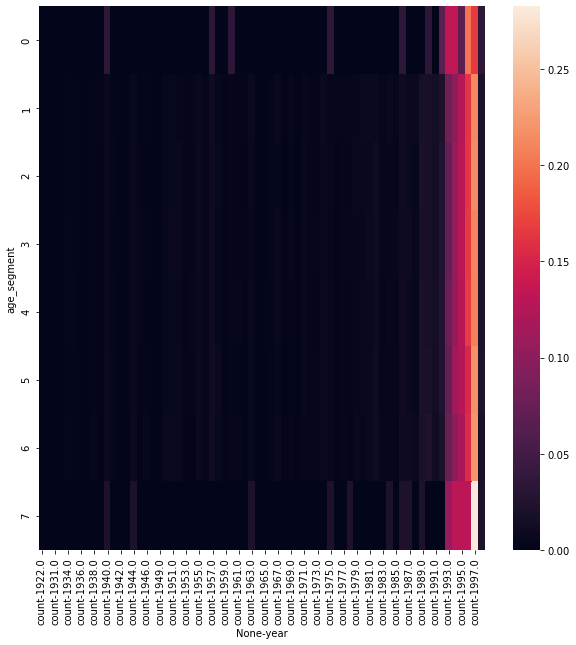

In [134]:
plot_heat_map(year, figsize=(10,10))

### Observe user profile 

In [141]:
user_genre_profile = user_item_df[user_item_df['rating']>3][['uid']+genres].groupby(['uid']).sum().reset_index()
total_features = user_item_df.merge(user_genre_profile, on=['uid'])

In [142]:
total_features

,iid,uid,rating,timestamp,title,release_date,video_release_date,imdb url,unknown_x,Action_x,...,Fantasy_y,Film-Noir_y,Horror_y,Musical_y,Mystery_y,Romance_y,Sci-Fi_y,Thriller_y,War_y,Western_y
0,196,242,3,881250949,Dead Poets Society (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Dead%20Poets%...,0,0,...,0,1,8,3,3,20,8,20,7,0
1,305,242,5,886307828,"Ice Storm, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ice+Storm%2C+...,0,0,...,0,1,8,3,3,20,8,20,7,0
2,6,242,4,883268170,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,...,0,1,8,3,3,20,8,20,7,0
3,234,242,4,891033261,Jaws (1975),01-Jan-1975,NaN,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,...,0,1,8,3,3,20,8,20,7,0
4,63,242,3,875747190,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,...,0,1,8,3,3,20,8,20,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90509,139,296,4,879538218,"Love Bug, The (1969)",01-Jan-1969,NaN,"http://us.imdb.com/M/title-exact?Love%20Bug,%2...",0,0,...,0,0,0,0,0,1,0,0,0,0
90510,655,296,4,888474934,Stand by Me (1986),01-Jan-1986,NaN,http://us.imdb.com/M/title-exact?Stand%20by%20...,0,0,...,0,0,0,0,0,1,0,0,0,0
90511,736,296,4,878709365,Shadowlands (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Shadowlands%2...,0,0,...,0,0,0,0,0,1,0,0,0,0
90512,733,296,2,879535265,Go Fish (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Go%20Fish%20(...,0,0,...,0,0,0,0,0,1,0,0,0,0


In [144]:
total_features = pd.get_dummies(total_features, columns=['gender', 'occupation'])

In [143]:
!pip install xgboost 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 173.5 MB 18 kB/s /s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [158]:
import xgboost
import shap

total_features=(total_features - total_features.mean()) / total_features.std()
y = total_features['rating']
X = total_features.drop(['rating', 'iid', 'uid', 'title', 'release_date', 'imdb url', 'zipcode', 'LOC', 'loc'], axis=1)

In [159]:
model = xgboost.XGBRegressor().fit(X, y)

In [160]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


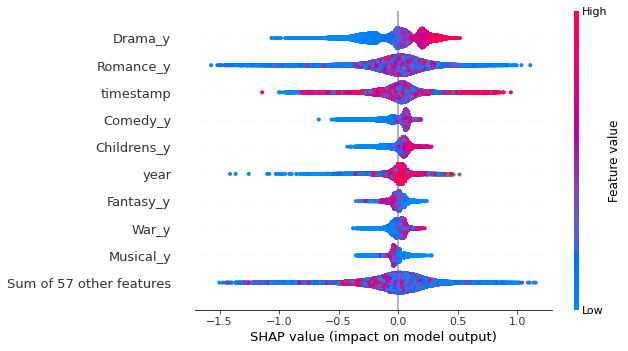

In [163]:
shap.plots.beeswarm(shap_values)


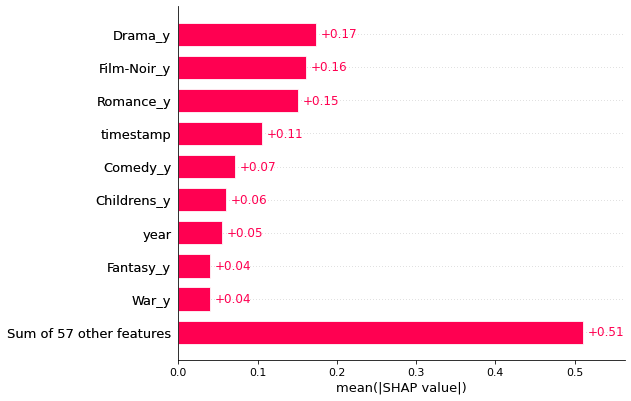

In [164]:
shap.plots.bar(shap_values)

In [137]:
user_df['loc'] = user_df['zipcode'].apply(lambda x:x[0:3])
user_demo_df = user_df[['uid', 'age', 'gender', 'occupation', 'loc']]

In [138]:
user_raw = user_demo_df.merge(user_genre_profile, on=['uid'])


In [139]:
oh_user = pd.get_dummies(user_raw, columns=['gender', 'occupation'])

In [140]:
oh_user

,uid,age,loc,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,857,0,65,38,7,30,103,24,...,0,0,0,0,0,0,0,0,1,0
1,2,53,940,0,11,5,0,4,13,4,...,0,0,1,0,0,0,0,0,0,0
2,3,23,320,1,7,3,1,3,12,1,...,0,0,0,0,0,0,0,0,0,1
3,4,24,435,0,20,11,3,11,39,9,...,0,0,0,0,0,0,0,0,1,0
4,5,33,152,0,8,3,0,5,14,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,939,26,333,0,11,5,0,3,14,2,...,0,0,0,0,0,0,0,1,0,0
913,940,32,022,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,941,20,972,0,4,2,1,1,5,0,...,0,0,0,0,0,0,0,1,0,0
915,942,48,782,0,5,2,0,2,7,3,...,0,0,0,0,0,0,0,0,0,0


[0.36466565 0.05216696 0.04114216 0.02585046 0.02558809]


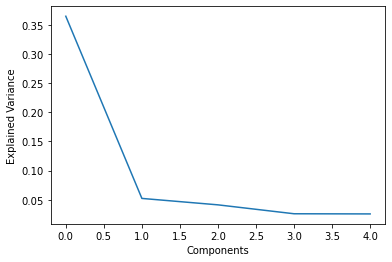

In [65]:
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
import pandas 

df_normalized=(oh_user - oh_user.mean()) / oh_user.std()
df_normalized = df_normalized.drop(['uid'], axis=1)
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_normalized)


print(pca.explained_variance_ratio_)
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()


In [66]:
principalDf = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])


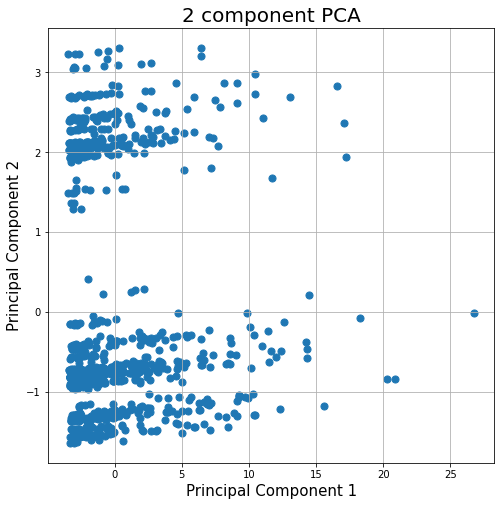

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               , s = 50)
ax.grid()

In [72]:
user_principal = pd.concat([oh_user[['uid']], principalDf], axis=1)
user_principal

,uid,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1,15.592810,-1.181576,-0.451496,-0.283580,-0.497224
1,2,-0.971502,2.138575,1.395117,0.326857,-2.301283
2,3,-1.365399,-0.443098,-0.452305,2.195322,0.935539
3,4,3.732919,-1.350611,-0.417918,0.199353,-0.111801
4,5,-1.051773,2.174430,0.286077,0.446644,-2.374694
...,...,...,...,...,...,...
912,939,-1.353966,2.050092,-1.804206,-0.861647,0.210300
913,940,-3.062711,-0.408515,0.256778,-0.455334,-0.641887
914,941,-2.339182,-0.801076,-2.181645,-0.664780,0.155782
915,942,-2.312965,2.695090,1.500370,-0.397148,1.396563


In [73]:
user_principal.to_csv('user_principal.csv')

In [76]:
oh_user[oh_user['uid']==1][['uid']+genres]

,uid,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,65,38,7,30,103,24,4,122,7,9,24,13,19,58,29,57,11,5


([<matplotlib.patches.Wedge at 0x7f621adf3320>,
 [Text(1.0924696170743335, 0.12849177315867075, 'unknown'),
  Text(1.0699815713282559, 0.2552242876724639, 'Action'),
  Text(0.9370620493675528, 0.576120400294142, 'Adventure'),
  Text(0.5437922152831378, 0.956185142426642, 'Animation'),
  Text(0.32252105715942286, 1.0516559169656055, 'Childrens'),
  Text(0.12849179233699348, 1.0924696148186581, 'Comedy'),
  Text(-0.5577269763981951, 0.9481247912578424, 'Crime'),
  Text(-1.0046087715684862, 0.4480638526902804, 'Documentary'),
  Text(-1.0562631454410278, 0.3070963490226259, 'Drama'),
  Text(-1.0400316083913503, -0.3582377053674015, 'Fantasy'),
  Text(-0.6299569075643486, -0.9017506831779851, 'Film-Noir'),
  Text(-0.5577270013647158, -0.948124776571482, 'Horror'),
  Text(-0.39854291665572616, -1.0252626705306047, 'Musical'),
  Text(-0.20801669741854611, -1.0801523288847186, 'Mystery'),
  Text(-0.0375552251203568, -1.099358724469024, 'Romance'),
  Text(0.36836756785030966, -1.036487016298828

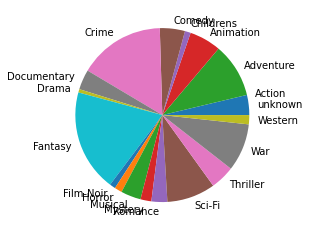

In [85]:
import matplotlib.pyplot as plt
plt.pie(oh_user.iloc[0].values[1:20], labels=genres)

([<matplotlib.patches.Wedge at 0x7f621ac7f1d0>,
 [Text(0.6810033604166863, 0.8638486112167925, 'unknown'),
  Text(-0.29858445582201093, 1.0587007711064886, 'Action'),
  Text(-0.6111272188573065, 0.9146165985656143, 'Adventure'),
  Text(-0.9146165484999839, 0.6111272937858174, 'Animation'),
  Text(-0.9989574747690309, 0.4605257469491594, 'Childrens'),
  Text(-1.0587007510134747, 0.2985845270664655, 'Comedy'),
  Text(-1.0461621703115804, -0.339918686466284, 'Crime'),
  Text(-0.7466808101601322, -0.80775476955485, 'Documentary'),
  Text(-0.6810033326144117, -0.8638486331343386, 'Drama'),
  Text(-0.2567898852199222, -1.069606916043805, 'Fantasy'),
  Text(0.21459937000063456, -1.0788638053041408, 'Film-Noir'),
  Text(0.256789916514868, -1.0696069085305533, 'Horror'),
  Text(0.4209517934421911, -1.0162674783726, 'Musical'),
  Text(0.5747484398477902, -0.9379041693544876, 'Mystery'),
  Text(0.6111272750536899, -0.9146165610163921, 'Romance'),
  Text(0.863848635126843, -0.6810033300869319, 'Sc

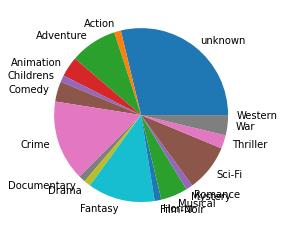

In [87]:
import matplotlib.pyplot as plt
plt.pie(oh_user.iloc[2].values[1:20], labels=genres)

In [167]:
user_item_df.to_pickle("user_item_df.p")
item_df.to_pickle("item_df.p")
oh_user.to_pickle("user_df.p")